In [1]:
import pandas as pd
# 2. numpy : Python library hels accesss the mathematical functions ,etc.
import numpy as np
# 3. matplotlib : build upon the numpy module helps to plot various graphs
import matplotlib.pyplot as plt 
# 4. tensorflow : important module which helps to work with image data set also has keras to use layering properties
import tensorflow as tf
from tensorflow import keras
from keras import layers
from  keras import Sequential

In [2]:
#our data is in the form of folders ,in order to accesss the images using tensorfolw function we need folders path ,and that is done here
dataurl=r"C:\Users\DHANSHRI\Desktop\Classification\Projects\BonesF"

In [3]:
import splitfolders
splitfolders.ratio('BonesF', output="output", seed=1337, ratio=(0.8, 0.1,0.1))

Copying files: 2240 files [00:16, 136.02 files/s]


In [4]:
data_train_path =r'C:\Users\DHANSHRI\Desktop\Classification\Projects\output\train'
data_test_path=r'C:\Users\DHANSHRI\Desktop\Classification\Projects\output\test'
data_val_path=r'C:\Users\DHANSHRI\Desktop\Classification\Projects\output\val'

In [5]:
data_train= tf.keras.utils.image_dataset_from_directory(
    data_train_path,#path of folder
    shuffle=True,#its like random state 
    batch_size=32,
    validation_split=False
)

Found 1859 files belonging to 8 classes.


In [6]:
data_val= tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=False,
    batch_size=32,
    validation_split=False #we alreay have validation data set hence no need to split it again
)

Found 259 files belonging to 8 classes.


In [7]:
data_test= tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 272 files belonging to 8 classes.


In [8]:
data_cat=data_train.class_names

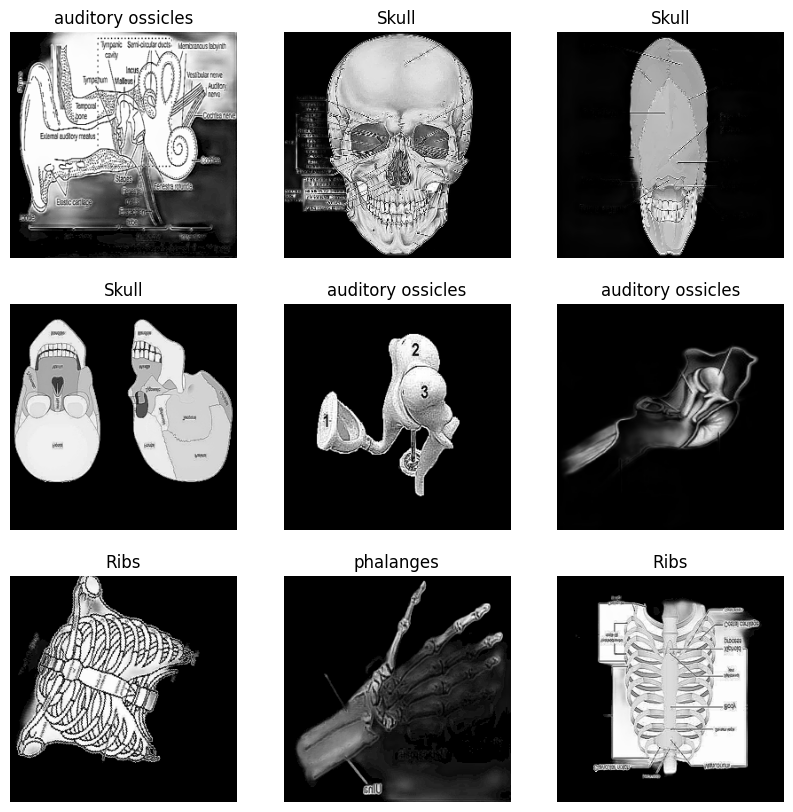

In [9]:
plt.figure(figsize=(10,10))
for image ,lables in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)#formation of grid  3*3 image matrix
        plt.imshow(image[i].numpy().astype('uint8'))#imshow helps to display images
        plt.title(data_cat[lables[i]])#fetching the titles from previously form lables list
        plt.axis('off')#hides the axix

In [10]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
from tensorflow.keras import layers, Sequential

num_classes = 8  # Number of classes in your dataset

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [14]:
epochs_size=25
history= model.fit(data_train,validation_data=data_val,epochs=epochs_size,batch_size=32,verbose=1)

Epoch 1/25
59/59 [==============================] - 31s 515ms/step - loss: 0.0162 - accuracy: 0.9957 - val_loss: 2.0017 - val_accuracy: 0.7799
Epoch 2/25
59/59 [==============================] - 27s 458ms/step - loss: 0.0331 - accuracy: 0.9903 - val_loss: 1.4513 - val_accuracy: 0.7838
Epoch 3/25
59/59 [==============================] - 27s 459ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 1.7331 - val_accuracy: 0.8031
Epoch 4/25
59/59 [==============================] - 27s 455ms/step - loss: 0.0180 - accuracy: 0.9946 - val_loss: 1.5577 - val_accuracy: 0.8069
Epoch 5/25
59/59 [==============================] - 27s 455ms/step - loss: 0.0526 - accuracy: 0.9839 - val_loss: 1.5170 - val_accuracy: 0.7954
Epoch 6/25
59/59 [==============================] - 27s 453ms/step - loss: 0.0238 - accuracy: 0.9930 - val_loss: 1.7963 - val_accuracy: 0.7915
Epoch 7/25
59/59 [==============================] - 29s 486ms/step - loss: 0.0100 - accuracy: 0.9952 - val_loss: 2.0757 - val_accuracy: 0.8108

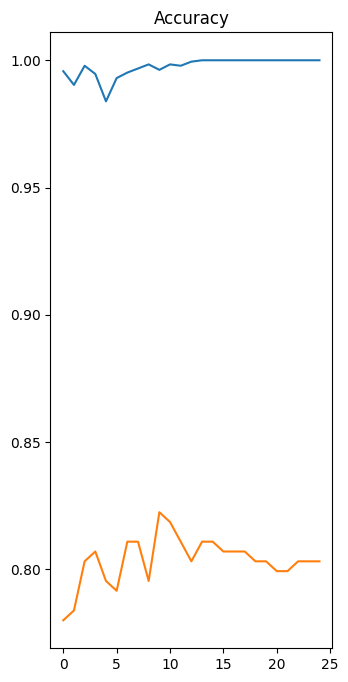

Text(0.5, 1.0, 'Loss')

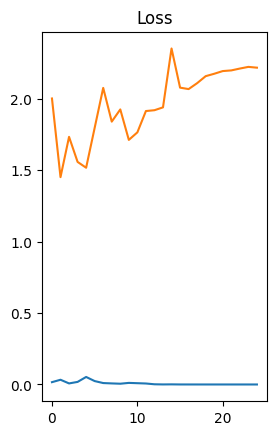

In [15]:
epochs_range =range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Accuracy')
plt.show()

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training loss')
plt.plot(epochs_range,history.history['val_loss'],label='Validation loss')
plt.title('Loss')


In [39]:
import tensorflow as tf
import keras
i = 'C:/Users/DHANSHRI/Desktop/Classification/Projects/BonesF/Ribs/0000-1 (2).jpg'
image =tf.keras.utils.load_img(i,target_size=(256,256))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

# # Predict with the model
predict = model.predict(img_bat)
print(predict)

1/1 [==============================] - 0s 28ms/step
[[3.1131649e-11 9.9999869e-01 6.4690760e-16 5.1948324e-18 1.6955700e-20
  4.5376740e-17 8.8473346e-17 1.2565134e-06]]


In [40]:
score=tf.nn.softmax(predict)

In [41]:

print('the bone in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

the bone in image is Ribs with accuracy of 27.97
